https://pymolwiki.org/index.php/Jupyter

In [1]:
import tempfile

from IPython.display import display, Image

import pandas as pd

from pymol import cmd

import pdb_prot_align.colorschemes
import pdb_prot_align.pymol_struct

In [16]:
sites_csv = 'output_files/beta_coronavirus_Spike_sites.csv'

max_neff = pd.read_csv(sites_csv)['n_effective'].max()
print(f"Max number of effective amino acids is {max_neff:.2f}")

Max number of effective amino acids is 7.50


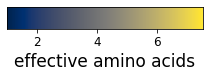

In [17]:
color_map = pdb_prot_align.colorschemes.ValueToColorMap(minvalue=1,
                                                        maxvalue=max_neff,
                                                        cmap='cividis')

_ = color_map.scale_bar(label='effective amino acids', orientation='horizontal')

In [6]:
pdbfile = 'input_files/6crv.pdb'


In [7]:
cmd.load(pdbfile)
cmd.bg_color('white')

 PyMOL not running, entering library mode (experimental)


In [8]:
cmd.hide('everything')
cmd.show('cartoon', 'chain A+B+C')

In [ ]:
set_view (\
     0.911516845,    0.088619262,   -0.401601136,\
     0.411251098,   -0.188872188,    0.891738057,\
     0.003175047,   -0.977994919,   -0.208603635,\
     0.000000000,    0.000000000, -443.616516113,\
   164.800567627,  164.793365479,  167.758102417,\
   349.750640869,  537.482421875,  -20.000000000 )

In [18]:
pdb_prot_align.pymol_struct.color_by_site(cmd=cmd,
                                          sites_df=sites_csv,
                                          color_by=('n_effective', color_map),
                                          )

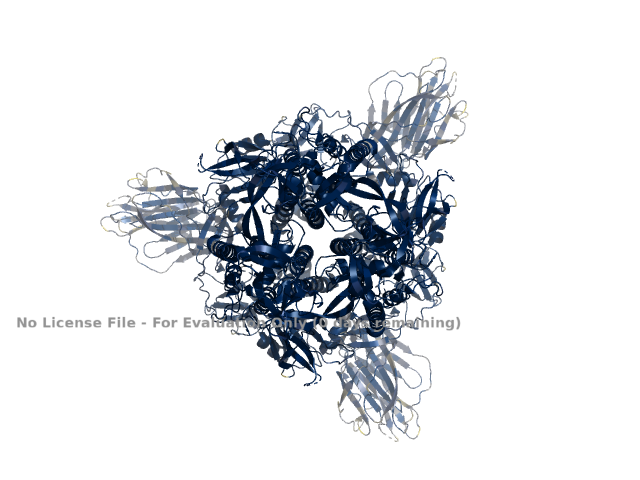

In [19]:
with tempfile.NamedTemporaryFile('w', suffix='.png') as f:
    cmd.png(f.name, ray=1)
    display(Image(f.name))